# Assignment-2: Manifold Learning

The objective of this assignment is to apply the concepts you have learned in class on Manifold Learning and Spectral Clustering. 

## Instructions
  - For each question you need to write the sub-problem formulation in markdown. 
  - Ensure that this notebook runs without errors when the cells are run in sequence.
  - Plagiarism will not be tolerated.
  - Use only `python3` to run your code.
  - If you are facing issues running the notebook on your local system. Use google collab to run the notebook online. To run the notebook online, go to [google collab](!https://colab.research.google.com/notebooks/intro.ipynb). Go to `File  -> Upload Notebook` and import the notebook file.

__NOTE__: If you use online platforms, you will have to upload `swissroll.dat` file separately and change the path in the code cell which loads the data.

## Submission  
- Rename the notebook to `<roll_number>.ipynb` and submit **ONLY** the notebook file on moodle.

## Problems 
 - Question 1: Spectral Clustering (10 marks)
 - Question 2: Manifold Visualization (10 marks)
 - Question 3: Clustering and Visualizing high-dimensional data (10 marks)
 - Question 4: Classification (10 marks)

## Deadline 
The deadline of this assignment is 27th April, 2020, 11:59 PM

In [17]:
import sys
# Install packages correctly
!{sys.executable} -m pip install numpy sklearn tensorflow keras
# Fix mpl version due to subtle API differences
!{sys.executable} -m pip install matplotlib==3.0.3

import numpy
# Allow usage of both `np` and `numpy`
np = numpy
import sklearn
import matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Question 1: Spectral Clustering

Implement spectral clustering and evaluate on the given concentric circles dataset for this question.

## Part 1: Implementation
Implement spectral clustering function from scratch (for two clusters), taking as input the dataset. It must return the predicted clustering. Assume that the graph constructed is a fully connected graph. Use the normalized graph laplacian for this case.



In [208]:
# Part 1: Spectral Clustering

def spectral_clustering(X):
    """Args:
    X: numpy.array [num_samples, input_dim]

    Returns:
    Y_pred: numpy.array [num_samples]
      array of cluster labels
    """
    # Your code here
    from sklearn.neighbors import radius_neighbors_graph
    A = radius_neighbors_graph(X, 1.5, mode='distance',include_self=False)
    A=A.toarray()
    W = np.exp(-A**2)
    # degree matrix
    D = np.diag(np.sum(np.array(W), axis=1))
    #print('degree matrix:')
    #print(D)
    
    # laplacian matrix
    L = D - W
    #print('laplacian matrix:')
    #print(L)
    
    
    #Normalized Laplacian matrix
    t=np.diag(1/np.sqrt(np.sum(np.array(W), axis=1)))
    #print(t)
    LL=np.matmul(t,L)
    LL=np.matmul(LL,t)
    L=LL
    e, v = np.linalg.eig(L)# eigenvalues and eigenvectors
    eigen_pairs=[(np.abs(e[i]),v[:,i]) for i in range(len(e))]
    eigen_pairs.sort(key=lambda x: x[0])
    
    Y_pred=[]
    for i in range(len(X)):
        if(v[i][1]>=0):
            Y_pred.append(0)
        else:
            Y_pred.append(1)
    Y_pred=np.array(Y_pred)
#     dim=X.shape[1]
#     l=[]
#     for i in range(1,dim+1):
#         l.append(eigen_pairs[i][1])
#     l=np.array(l)
#     print(l.shape)
#     U = l.T
#     km = KMeans(init='k-means++', n_clusters=2)
#     Y_pred=km.fit(U)
    return Y_pred


## Part 2: Clustering concentric circles
Perform spectral clustering on the concentric circles dataset. Visualize the result by plotting it on a 2-d graph. Use different colours for different clusters.

In [179]:
# DO NOT EDIT

from sklearn.datasets import make_circles 

CX, CY = make_circles(n_samples=200, shuffle=True,noise=0.05, random_state=1337, factor=0.5)
# CX: input data points [n_samples, 2]
# CY: true clusters [n_samples]

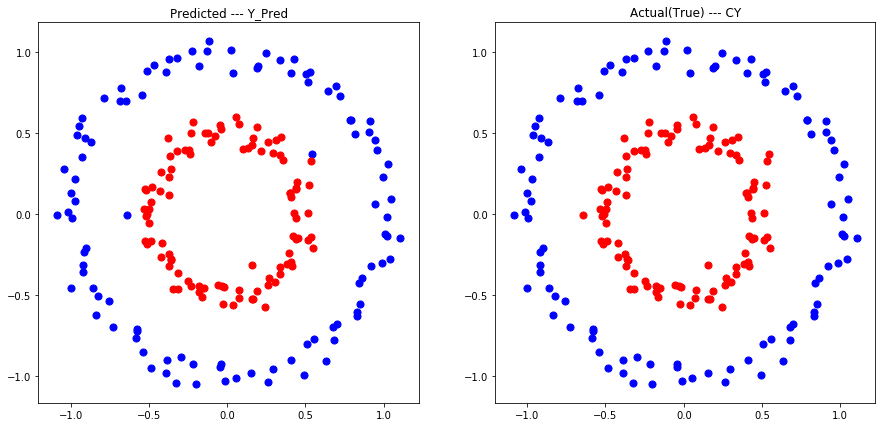

In [211]:
# Part 2: Perform Spectral Clustering on the concentric circles dataset
# Plot using colors from CY (true clusters) and CY_pred (predicted clusters)
# Code in this cell should plot 2 subplots (true labels and predicted labels)
Y_pred = spectral_clustering(CX)

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,7))

ax1.set_title('Predicted --- Y_Pred')
ax2.set_title('Actual(True) --- CY')

targets = [0,1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = Y_pred == target
    ax1.scatter(CX[indicesToKeep,0], CX[indicesToKeep,1], c = color, s = 50)
    
for target, color in zip(targets,colors):
    indicesToKeep = CY == target
    ax2.scatter(CX[indicesToKeep,0], CX[indicesToKeep,1], c = color, s = 50)




## Part 3: Evaluate accuracy
Evaluate the accuracy of the clustering by comparing it with the true labels. Create two subplots (true vs predicted) with the color of each point showing the cluster label.

In [212]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accu = accuracy_score(CY,Y_pred)
print('Accuracy : ',accu)
print() 
f1s = f1_score(CY,Y_pred,average='macro')
print('F1-Score : ',f1s)

Accuracy :  0.99

F1-Score :  0.98999899989999




---



# Question 2: Manifold Visualization
Implement the various manifold learning methods and visualize the given datasets.


## Part 1: MDS
Implement Multi-Dimensional Scaling

In [21]:
# Part 1: MDS


def MDS(X,k=1, output_dim=2):
    """ Args:
        X: numpy.array [n_samples, input_dim]
        k: number of nearest neighbours to construct the knn graph
        output_dim: dimension of output data

        Returns:
        Y: numpy.array [n_samples, output_dim]
    """
    n=len(X)
    from sklearn.metrics import pairwise_distances
    D = pairwise_distances(X, metric="euclidean")
    I=np.identity(n)
    E=np.ones([n,n])/n
    H=I-E
    K=np.matmul(H,D)
    K=np.matmul(K,H)/2
    #Svd
    u,s,v = np.linalg.svd(K)
    print(u.shape)
    d_lambda=np.sqrt(np.diag(s[:output_dim]))
    Y=np.matmul(d_lambda,u.T[:][:output_dim])
    
    return Y.T

## Part 2: LLE
Implement Locally Linear Embedding function

In [145]:
# Part 2: LLE

def LLE(X, k, output_dim=2):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
    """
    from sklearn.utils.graph import graph_shortest_path
    from sklearn.metrics import pairwise_distances
    from sklearn.neighbors import kneighbors_graph as kg
    A = kg(X,k, mode='distance')
    A=A.toarray()
    n = len(X)
    W = np.zeros((n,n))
    for i in range(n):
        Z = X[A[i,:]>0]-X[i]
        C = np.matmul(Z,Z.T)
        w = np.matmul(np.linalg.pinv(C),np.ones((C.shape[0],1)))
        W[i,A[i,:]==0] = 0
        W[i,A[i,:]>0] = (w/np.sum(w)).flatten()
    I=np.identity(n)
    temp=I-W
    M=np.matmul(temp.T,temp)
    values, u = np.linalg.eigh(M)
    Y= u[:, 1:output_dim+1]
    print(Y.shape)
    return Y

## Part 3: ISOMAP
Implement Isomap Visualization  

In [73]:
# Part 3: Isomap

def ISOMAP(X, k, output_dim=2):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
    """
    from sklearn.utils.graph import graph_shortest_path
    from sklearn.metrics import pairwise_distances
    from sklearn.neighbors import kneighbors_graph as kg
    K = kg(X,k, mode='distance')
    dist=pairwise_distances(X, metric="euclidean")
    graph=np.zeros_like(dist)
    sort_dist=np.argsort(graph,axis=1)[:,1:k+1]
    
    for m,i in enumerate(sort_dist):
        graph[m,i]=dist[m,i]
        
    graph_=graph_shortest_path(K,directed=True)
    
    n=len(X)
    
    D = graph_**2
    I=np.identity(n)
    E=np.ones([n,n])/n
    H=I-E
    K=np.matmul(H,D)
    K=np.matmul(K,H)/2
    #Svd
    u,s,v = np.linalg.svd(K)
    #print(s)
    print(u.shape)
    d_lambda=np.sqrt(np.diag(s[:output_dim]))
    Y=np.matmul(d_lambda,u.T[:][:output_dim])
    
    return Y.T

## Part 3: Manifold Visualization
Visualize the S-shaped 3-d dataset using the MDS, ISOMAP, LLE

In [2]:
# DO NOT EDIT

from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=1000, random_state=1337)
# SX: input data [n_samples, 3]
# St: univariate position along manifold [n_samples], use for coloring the plots

The code in the next cell should draw a single plot with the following subplots:
1. 3D S-shaped dataset
2. 2D Manifold learnt using MDS
3. 2D Manifold learnt using ISOMAP
4. 2D Manifold learnt using LLE

Use the `St` variable to color the points in your visualizations. Use a color spectrum, and the position along the manifold to assign the color.

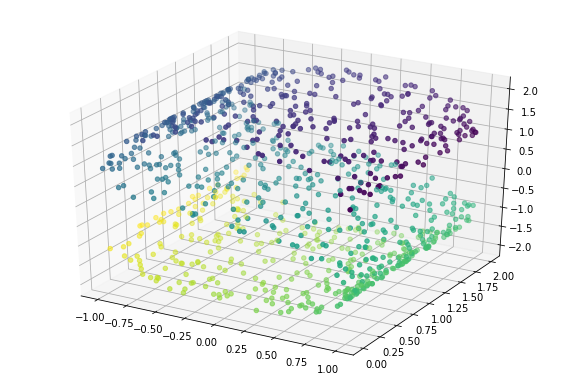

In [110]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

TSX=SX.T
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(TSX[0][:], TSX[1][:], TSX[2][:],zdir='z',c=St)

## MDS

(1000, 1000)


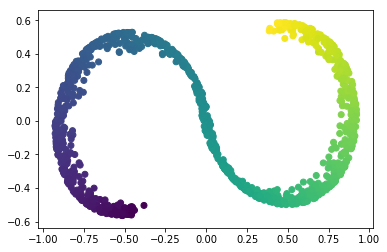

In [290]:
#MDS
Y_mds=MDS(SX)
plt.scatter(Y_mds.T[0],Y_mds.T[1],c=St)

## LLE

(1000, 2)


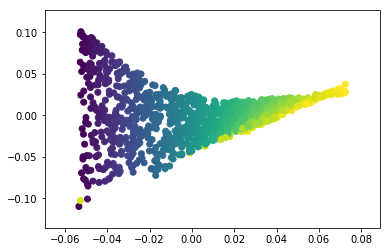

In [289]:
#LLE
Y_lle=LLE(SX,10)
plt.scatter(Y_lle.T[0],Y_lle.T[1],c=St)

## ISOMAP

(1000, 1000)


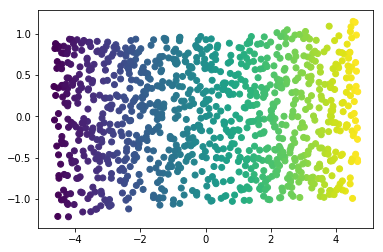

In [287]:
#ISOMAP
Y_isomap=ISOMAP(SX,50)
plt.scatter(Y_isomap.T[0],Y_isomap.T[1],c=St)


# Question 3: Clustering and Visualizing high-dimensional data
Perform k-means and spectral clustering on the Swiss roll dataset and visualize using the above 3 methods. State your observations.

In [111]:
# Swiss roll dataset loading here
d = []
with open('./swissroll.dat', 'r') as dat_file:
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = numpy.array(d)
print (swissroll.shape)

(1600, 3)


Procedure for this question:
1. Perform spectral clustering (2 clusters) on the unchanged Swiss roll and visualize (binary colors)
2. Unwrap the manifold in 2D and visualize using
  - MDS
  - ISOMAP
  - LLE

Use the labels from the spectral clustering to color the unwrapped manifolds.

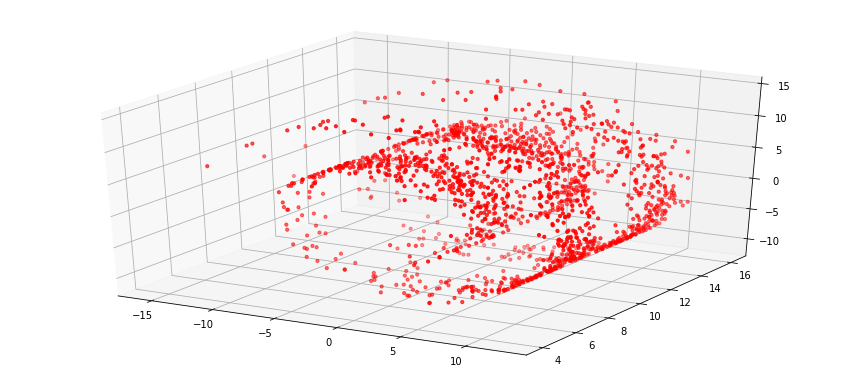

In [222]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(swissroll.T[0], swissroll.T[1], swissroll.T[2],c='r',s=10)

## K-means clustering

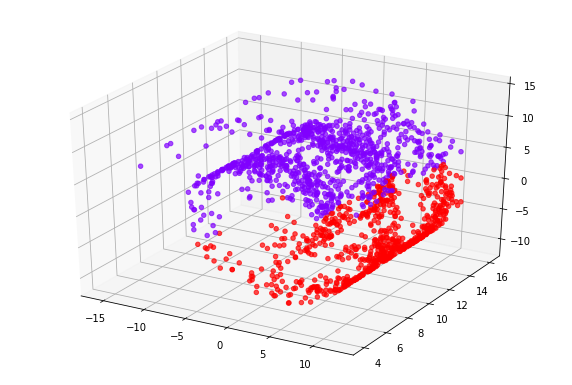

In [220]:
#Kmeans
from sklearn.cluster import KMeans
km = KMeans(init='k-means++', n_clusters=2)
km_clustering = km.fit(swissroll)

fig = plt.figure(figsize=(10,15))
ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(swissroll[:,0], swissroll[:,1],swissroll[:,2], c=km_clustering.labels_,zdir='z',cmap='rainbow', alpha=0.7)


## Spectral Clustering 

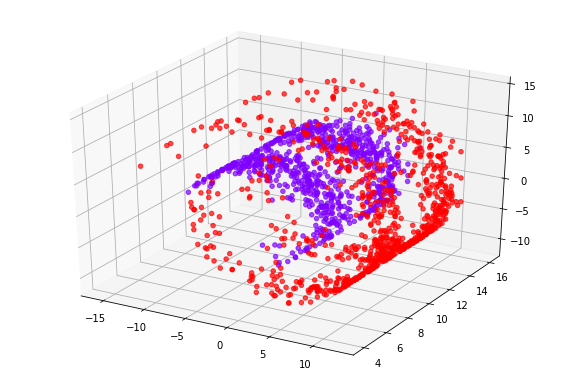

In [223]:
#SpectralClustering
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans')
labelsS = sc.fit_predict(swissroll)


fig = plt.figure(figsize=(10,15))
ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(swissroll[:,0], swissroll[:,1],swissroll[:,2], c=sc.labels_,zdir='z',cmap='rainbow', alpha=0.7)


In [225]:
color=sc.labels_

## MDS

(1600, 1600)


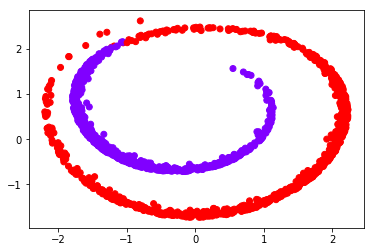

In [227]:
#MDS
Y_mds=MDS(swissroll)
plt.scatter(Y_mds.T[0],Y_mds.T[1],c=color,cmap='rainbow')

## LLE

(1600, 2)


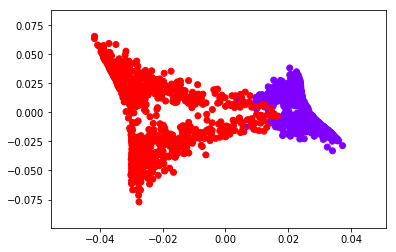

In [228]:
#LLE
Y_lle=LLE(swissroll,30)
plt.scatter(Y_lle.T[0],Y_lle.T[1],c=color,cmap='rainbow')

## ISOMAP

(1600, 1600)


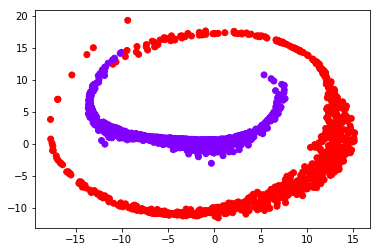

In [282]:
#ISOMAP
Y_isomap=ISOMAP(swissroll,200)
plt.scatter(Y_isomap.T[0],Y_isomap.T[1],c=color,cmap='rainbow')

## Observations

     1. When Using the k-means algorithm for clustering, we get the output like we have cut the swiss roll into parts by a plane because the cluster formed by kmeans are spherical.

    2. while using Spectral clustering, we get the ouput like when we unfold the swissroll and then cut it because it tries to do the clustering on the manifold.

    3. MDS preserves the euclidean distance of the points. Hence, we get the spiral shape curve.
    
    4. Since, the manifold of the swissroll is like a sheet, we get the output of the lle like sheet.
    
    5. The output of Isomap is little unexpected but actually we should get the sheet like manifold.




---



# Question 4: Classification

Perform classification using a machine learning algorithm of your choice. Use 6k images from CIFAR-10 dataset.(5k images for training and 1k images for testing.)


*   Do dimensionality reduction on the dataset using PCA and ISOMAP.
*   Apply the classification algorithm.
*   Compare the results by changing the dimensionality of the data.
*   Use F1-score as metric.
*   Approach: Reduce the dimensionality into any two dimensions(of your choice) which are less than the initial dimensionality of the data using PCA and ISOMAP. Compare the performance metrics(F1-score) for the low dimensional data.



In [267]:
# Code for loading CIFAR-10 dataset.
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train[:5000].reshape([5000,32*32*3])
y_train = y_train[:5000]
X_test = X_test[:1000].reshape([1000,32*32*3])
y_test = y_test[:1000]
# Initial dimensionality/number of features (32*32*3) = 3072.

In [268]:
def reductionUsingPCA(X, k, output_dim):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    pca_X: numpy.array [n_samples, output_dim]
    """
    k=1
    from sklearn.decomposition import PCA
    pca = PCA(n_components=output_dim)
    pca.fit(X)
    return pca.transform(X)

In [269]:
def reductionUsingISOMAP(X, k, output_dim):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    isomap_X: numpy.array [n_samples, output_dim]
    """
    from sklearn.manifold import Isomap
    embedding = Isomap(n_neighbors=k,n_components=output_dim)
    Y_isomap= embedding.fit_transform(X)
    
    return Y_isomap

## Here, I have used SVM classifier for classification

In [275]:
# Classification Algorithm 
# Extra functions here

def classification(X,y,X_test,n_classes):
    """Args:
    X: numpy.array [n_samples, input_dim]
    n_classes: number of classes

    Returns:
    labels: numpy_array [n_samples]
    """
    from sklearn import svm
    clf_svm = svm.SVC(kernel='rbf',decision_function_shape='ovr')
    clf_svm.fit(X,y)
#     from sklearn.linear_model import LogisticRegression
#     clf = LogisticRegression(random_state=0).fit(X, y)
    
    labels=clf_svm.predict(X_test)
    
    return labels


In [271]:
def F1_score(y_true, y_pred):
    """Args:
    y_true: numpy.array [n_samples] , ground truth value
    y_pred: numpy.array [n_samples] , predicted value by classifier

    Returns:
    score: float, f1-score
    """
    from sklearn.metrics import f1_score
    
    score = f1_score(y_true,y_pred,average='macro')
    return score

In [272]:
X_train.shape

(5000, 3072)

In [273]:
y_train=y_train.flatten()
y_test=y_test.flatten()

In [276]:
X_train_pca=reductionUsingPCA(X_train,5,100)
X_test_pca=reductionUsingPCA(X_test,5,100)
y_pred=classification(X_train_pca,y_train,X_test_pca,10)
print('F1-Score  :',F1_score(y_test,y_pred))

0.29986021988239797


In [281]:
X_train_pca=reductionUsingPCA(X_train,5,400)
X_test_pca=reductionUsingPCA(X_test,5,400)
y_pred=classification(X_train_pca,y_train,X_test_pca,10)
print('F1-Score  :',F1_score(y_test,y_pred))

F1-Score  : 0.3104848917738949


In [278]:
X_train_im=reductionUsingISOMAP(X_train,5,100)
X_test_im=reductionUsingISOMAP(X_test,5,100)
y_pred=classification(X_train_im,y_train,X_test_im,10)
print('F1-Score  :',F1_score(y_test,y_pred))

F1-Score  : 0.187542634925141


In [280]:
X_train_im=reductionUsingISOMAP(X_train,5,400)
X_test_im=reductionUsingISOMAP(X_test,5,400)
y_pred=classification(X_train_im,y_train,X_test_im,10)
print('F1-Score  :',F1_score(y_test,y_pred))

F1-Score  : 0.19013081439682714


## Observations :

        1. When using pca we get better F1_score compared to isomap reduction.
        2. When the dimensions are increased, we get better F1 score in both the cases.
        
        summary table:
        --------------
            dimension               100                     400
           ------------------------------------------------------
            
           Pca f1 score            0.299                    0.31
           
           Isomap f1 score         0.1875                   0.190
           
           
        3. We get better result in pca because pca maximizes the variance of the data    samples it plays a important role in prediction and while Isomap preserves the geodesic distance which may not be useful in prediction but It is very useful in data        visualization.
        
        